# **Student's Behavioural Learning Project**

Introduction 
* The project orientation was explicitly developed by using Open University Dataset with the scope of experimenting the student's learning behaviors based on multiple features and the final results are whether PASS | FAIL | WITHDRAWN | DISTINCTION

Summary
* Input : Extracted Features from 7 tables relating to student's records 
* Recognize Problem : Multi - class Classification
* Output : 4 classes from target column ( PASS, FAIL, WITHDRAWN, DISTINCTION )

Dataset Source
* https://analyse.kmi.open.ac.uk/open_dataset

References:
* [Encoding Technique](https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621)
* [How to use GridSearchCV + Pipeline](https://www.projectpro.io/recipes/optimize-hyper-parameters-of-decisiontree-model-using-grid-search-in-python)
* [KNN](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
* [SVC](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)
* [Scikit-learn](https://scikit-learn.org/stable/)
* [Feature Engineering](https://www.analyticsvidhya.com/blog/2021/03/step-by-step-process-of-feature-engineering-for-machine-learning-algorithms-in-data-science/)
* [Supportive Lectures from AI4E](https://www.facebook.com/nttuan8.AI4E)


Supporters & Owner:
* Owner : Vũ Kim Duy
* Lecturer : Nguyễn Thanh Tuấn
* Teaching Assisstant : Nguyễn Thành Trung 

Github Link:
* https://github.com/vukimduy752000/Open-University-Learning-Analysis.git

---




# Import Dataset and Libraries

## Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Copy Dataframe
import copy


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Dataset

In [ ]:
%cd "/content/drive/MyDrive/"

/content/drive/MyDrive


In [ ]:
df_assessments = pd.read_csv("assessments.csv")
df_courses     = pd.read_csv("courses.csv")
df_stuAss      = pd.read_csv("studentAssessment.csv")
df_stuInfo     = pd.read_csv("studentInfo.csv")
df_stuReg      = pd.read_csv("studentRegistration.csv")
df_stuVle      = pd.read_csv("studentVle.csv")
df_vle         = pd.read_csv("vle.csv")

In [ ]:
# Assessments 
df_assessments.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
# Courses
df_courses.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


In [ ]:
# Student Assessments
df_stuAss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [ ]:
# Student Registration
df_stuReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
# Student Information 
df_stuInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


In [ ]:
# Student Virtual Learning Online
df_stuVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [ ]:
# Virtual Learning Online
df_vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


# Utilities Function

This section created purposely to store some usefull function that I will utilize within the scope of this project. 

In [ ]:
# Function to deep copy the orginal dataframe so as to avoid interacting with original dataframe's data
def deepCopy(org_df):
  return copy.deepcopy(org_df);

# Check if the datapoint is NaN or not 
def isNaN(value):
  if value != value:
    return True
  else:
    return False  

# Generate Percentage of Nan Values
def generateNanPercentage(df):
  percent_nan = 100 * pd.isna(df).sum() / len(df)
  return percent_nan

# Generate Percentage of Outlier
def generateOutlier(df,df_name):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  irq = q3 - q1
  outliers = df[(df < q1 - 1.5 * irq) | (df >= q3 + 1.5 * irq)]
  print("Outliers of %s: %.2f%%"  % (df_name, len(outliers) * 100.0 / len(df)))


# Standard Countplot for single DataFrame
def createCountPlot(data,x,hue=None,yLimit=None,xTickRotation=0, ax=None):
  plt.figure(figsize=(10,5))
  sns.countplot(data=data,
                x=x,
                hue=hue,
                ax=ax)
  plt.ylim(yLimit)
  plt.xticks(rotation=xTickRotation)
  plt.show()


# Standard Histogram for single DataFrame
def createHistogram(data,x,hue=None, yLimit=None, ax=None):
  plt.figure(figsize=(10,5))
  sns.histplot(data=data,
               x=x,
               hue=hue,
               ax=ax)
  plt.ylim(yLimit)
  plt.show()

# Standard Distribution for single Dataframe
def createDisPlot(data,x=None, yLimit=None,bins=20, xLabel=None,ax=None):
  plt.figure(figsize=(10,5))
  sns.displot(data=data, 
              x=x, 
              bins=bins,
              kde=True,
              ax=ax,
              color="red", edgecolor="blue", linewidth=1, ls="--")
  plt.ylim(yLimit)
  plt.xlabel(xLabel)
  plt.show()

# Standard Distribution for single Dataframe
def createBoxPlot(data,x=None,y=None,hue=None,ax=None,xLabels=None):
  plt.figure(figsize=(15,10))
  sns.boxplot(data=data,
              x=x,
              y=y,
              ax=ax,
              hue=hue)
  plt.xticks(rotation=90, labels=xLabels)
  plt.legend(bbox_to_anchor=(1.2,1))
  plt.show()

# Standard CatPlot for single Dataframe
def createCatPlot(data, x, y, alpha=1,ax=None):
  plt.figure(figsize=(10,5))
  sns.catplot(data=data,
              x=x,
              y=y,
              ax=ax,
              alpha=alpha)
  plt.show()

# Dataset Preparation and Cleaning
After having exploratory on the document, I decide to dig into those potential tables so as to conduct the final dataset for training model

* assessments
* student_assessments 
* student_information 
* student_vle 


## Student Information
Firstly, I will assess table relating to student since our target is to idenfity the student's final result based on features

In [ ]:
df_stuInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


Deep copy student's dataframe for examination

In [ ]:
copied_df_stuInf = deepCopy(df_stuInfo)

Regarding to the info(), only imd_band feature has null value. which I will fill up with "Missing" data since it's value type is the categorical data

In [ ]:
copied_df_stuInf["imd_band"] = copied_df_stuInf["imd_band"].fillna("Missing")

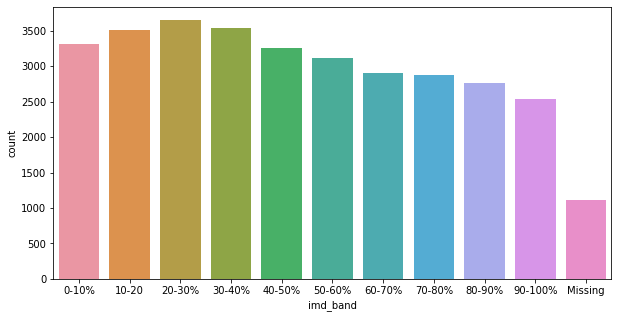

In [ ]:
createCountPlot(data=copied_df_stuInf.sort_values(by=["imd_band"]),
                x="imd_band")

Checking how many unique student within the table

In [ ]:
len(copied_df_stuInf["id_student"].unique())

28785

Currently, we have 28785 unique student compared to the len of original data, 32593 students.

According to the document, those duplicated data point could be a result of re-enrollment or resit the exam.

In [ ]:
copied_df_stuInf.value_counts(subset=["id_student"])

id_student
584077        5
399863        4
610287        4
2681198       4
548926        4
             ..
623537        1
623541        1
623542        1
623548        1
3733          1
Length: 28785, dtype: int64

I will take sample of some duplicated students to examine

In [ ]:
copied_df_stuInf[copied_df_stuInf["id_student"] == 584077]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9587,CCC,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
11525,CCC,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,90,N,Withdrawn
15596,DDD,2013J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
16828,DDD,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,1,150,N,Withdrawn
18139,DDD,2014J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,2,90,N,Withdrawn


Practically, those duplicated record happens likely with the student who WITHDRAWN or FAIL the module.

I decide to drop duplicate student regarding to id_student and code_module hence student may join different modules 

In [ ]:
copied_df_stuInf = copied_df_stuInf.drop_duplicates(subset=["id_student","code_module"])

In [ ]:
copied_df_stuInf[copied_df_stuInf["id_student"] == 584077]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
9587,CCC,2014B,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn
15596,DDD,2013J,584077,M,North Western Region,A Level or Equivalent,20-30%,0-35,0,150,N,Withdrawn


Checking how many FAIL, PASS, WITHDRAW and DISTINCTION students

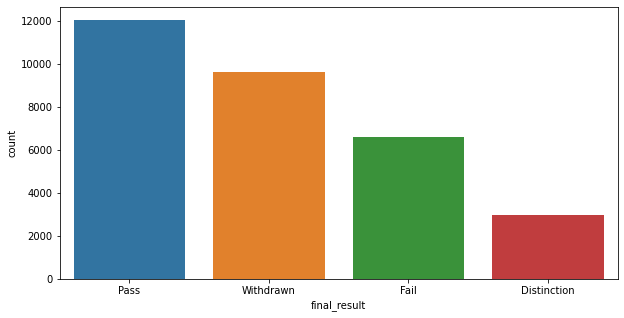

In [ ]:
createCountPlot(data=copied_df_stuInf,
                x="final_result")

Assign back our copied dataset into original dataframe for further usage

In [ ]:
df_stuInfo = copied_df_stuInf

## Student VLE


According to the document, this table records how many times student interact with the VLE 


In [ ]:
df_stuVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [ ]:
generateNanPercentage(df_stuVle)

code_module          0.0
code_presentation    0.0
id_student           0.0
id_site              0.0
date                 0.0
sum_click            0.0
dtype: float64

In [ ]:
copied_df_stuVle = deepCopy(df_stuVle)

Checking the unique student within the dataset


In [ ]:
len(copied_df_stuVle["id_student"].unique())

26074

As you notice from the df_student_information that there is 28785 unique student but observing 26074 unique students from Student VLE.

Practically, I will check the final result of those student who does and does not interact with VLE 

In [ ]:
# Using Set and Difference to filter conditioning values
df_unique_total_student_id         = set(df_stuInfo["id_student"])
df_unique_total_student_id_in_vle  = set(copied_df_stuVle["id_student"])
list_student_id_not_in_vle         = list(df_unique_total_student_id.difference(df_unique_total_student_id_in_vle))

# Extract students from list of non in VLE 
df_student_not_vle = df_stuInfo[df_stuInfo["id_student"].isin(list_student_id_not_in_vle)]

In [ ]:
print("Students interact with VLE: ", len(df_unique_total_student_id_in_vle))
print("Actual unique students: ", len(df_unique_total_student_id))
print("Student does not interact with VLE: ",len(df_student_not_vle["id_student"].unique()))

Students interact with VLE:  26074
Actual unique students:  28785
Student does not interact with VLE:  2711


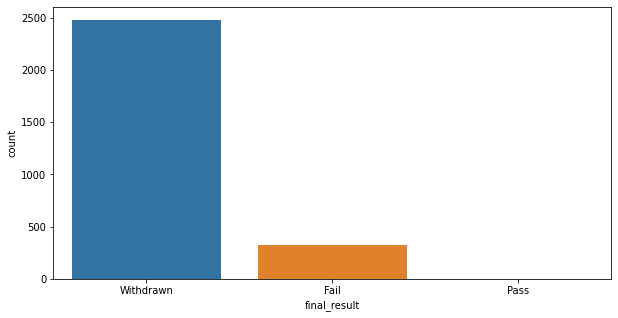

In [ ]:
createCountPlot(data=df_student_not_vle,
                x="final_result")

Observing from the chart that almost WITHDRAWN or FAIL student does not have interaction with VLE, which denotes that the sum_click could influence to the final_result of the student

I will pickup the sum_click feature for my dataset



Since there are duplicated id_student leading to the fact that one student will be recorded multiple times based on the code_module and code_presentation

I will group duplicate id_student and code_module since this is the module - oriented with the total clicks of individual student

In [ ]:
columns = ["id_student","code_module"];
sum_click_stuVle = copied_df_stuVle.groupby(by=columns,
                         axis=0).aggregate({"sum_click": "sum"})

In [ ]:
sum_click_stuVle.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 28237 entries, (6516, 'AAA') to (2698588, 'BBB')
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sum_click  28237 non-null  int64
dtypes: int64(1)
memory usage: 507.2+ KB


## Joining Student Information and Student VLE

I will include the total of click of unique student joining mutiple code_module into the Student table

In [ ]:
df_merge_stuVle_stuIn = pd.merge(left=df_stuInfo,
                              right=sum_click_stuVle,
                              how="left",
                              on=["id_student","code_module"])

In [ ]:
df_merge_stuVle_stuIn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           31284 non-null  object 
 1   code_presentation     31284 non-null  object 
 2   id_student            31284 non-null  int64  
 3   gender                31284 non-null  object 
 4   region                31284 non-null  object 
 5   highest_education     31284 non-null  object 
 6   imd_band              31284 non-null  object 
 7   age_band              31284 non-null  object 
 8   num_of_prev_attempts  31284 non-null  int64  
 9   studied_credits       31284 non-null  int64  
 10  disability            31284 non-null  object 
 11  final_result          31284 non-null  object 
 12  sum_click             28237 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 3.3+ MB


As indicate before, there are 2711 unique student who did not participate in VLE, which results in missing value on sum_click feature when merging 2 dataframe.

Obviously, non-interaction will recieve 0 sum_clicks

In [ ]:
df_merge_stuVle_stuIn["sum_click"] = df_merge_stuVle_stuIn["sum_click"].fillna(0)

In [ ]:
df_merge_stuVle_stuIn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           31284 non-null  object 
 1   code_presentation     31284 non-null  object 
 2   id_student            31284 non-null  int64  
 3   gender                31284 non-null  object 
 4   region                31284 non-null  object 
 5   highest_education     31284 non-null  object 
 6   imd_band              31284 non-null  object 
 7   age_band              31284 non-null  object 
 8   num_of_prev_attempts  31284 non-null  int64  
 9   studied_credits       31284 non-null  int64  
 10  disability            31284 non-null  object 
 11  final_result          31284 non-null  object 
 12  sum_click             31284 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 3.3+ MB


## Student Assessments

At this dataframe, there is the score feature that I'm facinating to add into my final dataframe

In [ ]:
df_stuAss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


In [ ]:
generateNanPercentage(df_stuAss)

id_assessment     0.000000
id_student        0.000000
date_submitted    0.000000
is_banked         0.000000
score             0.099476
dtype: float64

Notice that there are just only 0.099476% of missing score value, which is extremely small comparing to our dataframe

This could be resolved on WITHDRAWN student who did not attend the exam

I would leave it and try to dig into the Assessment table, which also contains the id_assessment key to get the answer of Nan Score value

## Assessments 

Contains all information about the presentation in the module-presentation format

date: As indicated from the document, number represents how many days it started since the starting date and the starting date is denoted as 0 ( zero )

In [ ]:
df_assessments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB


In [ ]:
generateNanPercentage(df_assessments)

code_module          0.000000
code_presentation    0.000000
id_assessment        0.000000
assessment_type      0.000000
date                 5.339806
weight               0.000000
dtype: float64

Notice that we got nearly 5.33% of unknown starting date, which is quite circumvent

In [ ]:
unique_assessments = df_assessments["id_assessment"].unique()
print("Unique Assessment: ", len(unique_assessments))

Unique Assessment:  206


Joining the Student Asssessment with Assessment together so as to generate the full record of student attending assessments

In [ ]:
df_stuAss_record = pd.merge(left=df_stuAss,
                              right=df_assessments,
                              how="left",
                              on=["id_assessment"])
df_stuAss_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173912 entries, 0 to 173911
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_assessment      173912 non-null  int64  
 1   id_student         173912 non-null  int64  
 2   date_submitted     173912 non-null  int64  
 3   is_banked          173912 non-null  int64  
 4   score              173739 non-null  float64
 5   code_module        173912 non-null  object 
 6   code_presentation  173912 non-null  object 
 7   assessment_type    173912 non-null  object 
 8   date               171047 non-null  float64
 9   weight             173912 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 14.6+ MB


## Joining df_merge_stuVle_stuIn and df_stuAss_record


So far we got those dataframe:
* df_merge_stuVle_stuIn : Contain the information about student and final_result as the output
* df_stuAss_record : Contains the score relating to student, code module and code presentation of assessment

In [ ]:
print("Total length of Early Record: ", len(df_stuAss_record))
print("Total unique id_student within the Early Assessment Dataset: ", len(df_stuAss_record["id_student"].unique()))


Total length of Early Record:  173912
Total unique id_student within the Early Assessment Dataset:  23369


Apparently, 1 student can have multiple record of sitting various assessments, which I decide to group unique id_student and code_module with the mean score of module - oriented assessments

In [ ]:
# Deep copy the dataframe so as to avoid modification on original version
copied_df_stuAss_record = deepCopy(df_stuAss_record)
copied_df_stuAss_record = copied_df_stuAss_record.groupby(by=["id_student","code_module"]).agg({"score": ["mean"]})
copied_df_stuAss_record.head(5)

,,score
,,mean
id_student,code_module,
6516,AAA,61.800000
8462,DDD,87.000000
11391,AAA,82.000000
23629,BBB,82.500000
23698,CCC,74.444444


I use the displot to observe the distribution of the mean score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

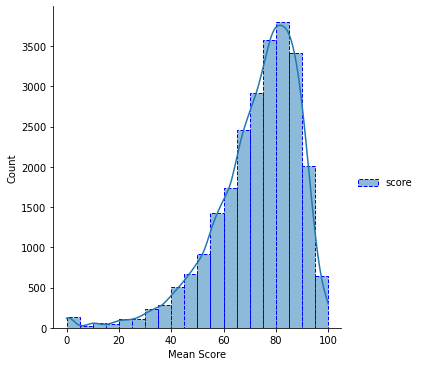

In [ ]:
createDisPlot(data=copied_df_stuAss_record,xLabel="Mean Score")

Notice the distribution diagram demonstrates that the mean is fluctuarating around ~80 score unit, which compatible with the early assessments that are mostly uncomplicated.

I will include mean_score as the potential feature for the last training dataframe 

In [ ]:
df_stuAss_record = copied_df_stuAss_record

## Final Active Student Tables

Up to this point, we have 2 main dataframe
* df_stuAss_record : Information relating to students and assessments
* df_merge_stuVle_stuIn : Information relating to students and Virtual Learning Environment

In [ ]:
df_stuAss_record.columns=["mean_score"]
df_stuAss_record = df_stuAss_record.reset_index()
df_stuAss_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25087 entries, 0 to 25086
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_student   25087 non-null  int64  
 1   code_module  25087 non-null  object 
 2   mean_score   25067 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 588.1+ KB


In [ ]:
df_merge_stuVle_stuIn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           31284 non-null  object 
 1   code_presentation     31284 non-null  object 
 2   id_student            31284 non-null  int64  
 3   gender                31284 non-null  object 
 4   region                31284 non-null  object 
 5   highest_education     31284 non-null  object 
 6   imd_band              31284 non-null  object 
 7   age_band              31284 non-null  object 
 8   num_of_prev_attempts  31284 non-null  int64  
 9   studied_credits       31284 non-null  int64  
 10  disability            31284 non-null  object 
 11  final_result          31284 non-null  object 
 12  sum_click             31284 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 3.3+ MB


Merging both 2 potential dataframe could give me more viral features which will be helpful for training process

In [ ]:
df_final_active_stu = pd.merge(left=df_merge_stuVle_stuIn,
                               right=df_stuAss_record,
                               how="outer",
                               on=["code_module","id_student"])

In [ ]:
df_final_active_stu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           31284 non-null  object 
 1   code_presentation     31284 non-null  object 
 2   id_student            31284 non-null  int64  
 3   gender                31284 non-null  object 
 4   region                31284 non-null  object 
 5   highest_education     31284 non-null  object 
 6   imd_band              31284 non-null  object 
 7   age_band              31284 non-null  object 
 8   num_of_prev_attempts  31284 non-null  int64  
 9   studied_credits       31284 non-null  int64  
 10  disability            31284 non-null  object 
 11  final_result          31284 non-null  object 
 12  sum_click             31284 non-null  float64
 13  mean_score            25067 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.6+ MB


In [ ]:
df_final_active_stu[df_final_active_stu["mean_score"].isnull()]["final_result"].value_counts()

Withdrawn    4992
Fail         1222
Pass            3
Name: final_result, dtype: int64

In [ ]:
# Sample of Withdrawn student
df_final_active_stu[df_final_active_stu["id_student"] == 640330]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean_score
7039,BBB,2014J,640330,M,South Region,Lower Than A Level,70-80%,55<=,0,60,N,Withdrawn,0.0,NaN


Notice that student WITHDRAWN and FAIL students tend to have mean_score due to some condition
* WITHDRAWN : could happen on unsitting the exam, which result in NaN score
* FAIL : could happen due to fail the first assessment leading to the procrastination on marking next assessment
* PASS : Exceptional 

To resolve this situation, I will use techinque data imputation to fill up all missing mean_score conditionally
* WITHDRAWN : mean_score will be filled with 0 since no evaluation happenning
* FAIL      : mean_score could be between 0 - 40 ( according to the documentation )
* PASS      : mean_score will be filled with 40 ( according to the documentation )

In [ ]:
copied_df_stuAss_record = deepCopy(df_final_active_stu)

Create the function to mapping Nan value corresponding to final_result

In [ ]:
def fillMeanScore(final_result, mean_score):
  if isNaN(mean_score):
    if final_result == "Withdrawn": return 0
    elif final_result == "Fail": return 39
    elif final_result == "Pass": return 40
  return mean_score


In [ ]:
# Impute mean_score features based on final_result
copied_df_stuAss_record["mean_score"] = np.vectorize(fillMeanScore)(copied_df_stuAss_record["final_result"], copied_df_stuAss_record["mean_score"])

In [ ]:
copied_df_stuAss_record[copied_df_stuAss_record["final_result"].isnull()]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click,mean_score


In [ ]:
copied_df_stuAss_record[copied_df_stuAss_record["mean_score"].isnull()].value_counts()

Series([], dtype: int64)

In [ ]:
copied_df_stuAss_record.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code_module           31284 non-null  object 
 1   code_presentation     31284 non-null  object 
 2   id_student            31284 non-null  int64  
 3   gender                31284 non-null  object 
 4   region                31284 non-null  object 
 5   highest_education     31284 non-null  object 
 6   imd_band              31284 non-null  object 
 7   age_band              31284 non-null  object 
 8   num_of_prev_attempts  31284 non-null  int64  
 9   studied_credits       31284 non-null  int64  
 10  disability            31284 non-null  object 
 11  final_result          31284 non-null  object 
 12  sum_click             31284 non-null  float64
 13  mean_score            31284 non-null  float64
dtypes: float64(2), int64(3), object(9)
memory usage: 3.6+ MB


Up to this point, we have already got our potential final dataframe for further exloratory and analysis

In [ ]:
# Assign back our modified df into original df
df_final_active_stu = copied_df_stuAss_record

# Exploratory Data Analysis

Practically, I will remove 
* code_presentation
* code_module,
* id_student,
* num_of_prev_attempts ( since it depends on code_module )
* studied_credits ( since it depends on code_module )


Since they were usefull for calculating specific student's information but useless for training general model ( data anonymization )



In [ ]:
df_final_active_stu = df_final_active_stu.drop(columns=["code_module","code_presentation","id_student","num_of_prev_attempts", "studied_credits"],axis=1)

In [ ]:
df_final_active_stu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             31284 non-null  object 
 1   region             31284 non-null  object 
 2   highest_education  31284 non-null  object 
 3   imd_band           31284 non-null  object 
 4   age_band           31284 non-null  object 
 5   disability         31284 non-null  object 
 6   final_result       31284 non-null  object 
 7   sum_click          31284 non-null  float64
 8   mean_score         31284 non-null  float64
dtypes: float64(2), object(7)
memory usage: 2.4+ MB


Now I will calculate the correlation among features and final_result of anonymized student

## Mean score & Final Result

No handles with labels found to put in legend.


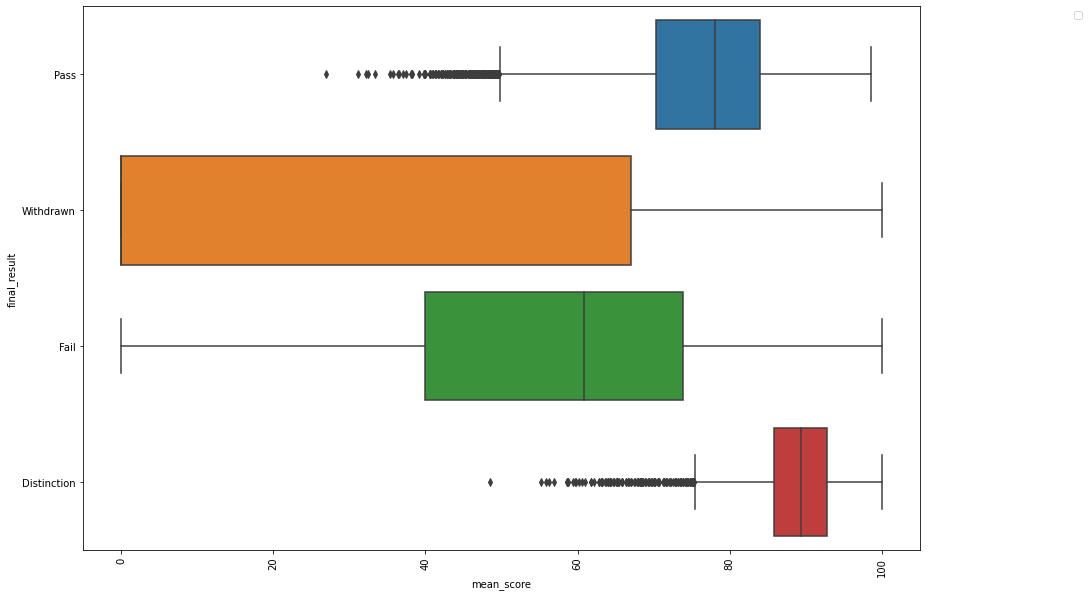

In [ ]:
createBoxPlot(df_final_active_stu,
              y="final_result",
              x="mean_score")

Being shown from the figure, We can observe that withdrawn or fail tends to have mean_score less than 70 while distinction or pass has mean_score tendency surroding 70 - 90 or 80 - 100, respectively 

In [ ]:
distinctions =  df_final_active_stu[df_final_active_stu["final_result"] == "Distinction"]["mean_score"]
passes =  df_final_active_stu[df_final_active_stu["final_result"] == "Pass"]["mean_score"]
withdrawns =  df_final_active_stu[df_final_active_stu["final_result"] == "Withdrawn"]["mean_score"]
fails =  df_final_active_stu[df_final_active_stu["final_result"] == "Fail"]["mean_score"]

generateOutlier(distinctions,"Distinction")
generateOutlier(passes,"Pass")
generateOutlier(withdrawns, "Withdrawn")
generateOutlier(fails, "Fail")

Outliers of Distinction: 4.66%
Outliers of Pass: 1.83%
Outliers of Withdrawn: 0.00%
Outliers of Fail: 0.00%


As demonstrated above, the mean_score takes important role on final_result which the higher the mean_score, the rate of having Distinction output and vice versa

## Clicks & Final Result

No handles with labels found to put in legend.


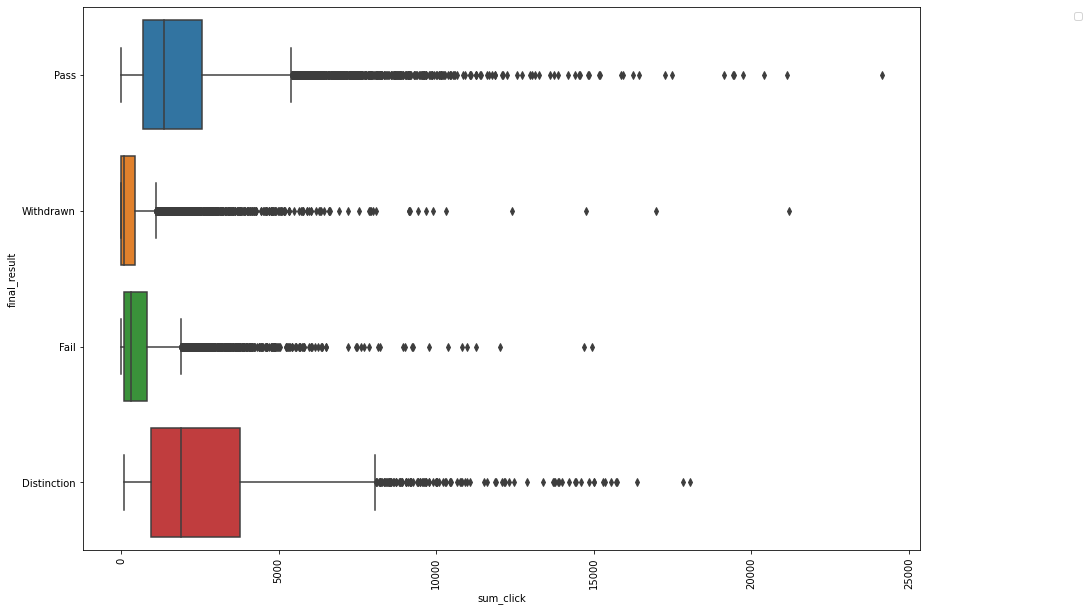

In [ ]:
createBoxPlot(df_final_active_stu,
              y="final_result",
              x="sum_click")

Same behavior applied to sum_click as mean_score, which demonstrate that if having Distinction and Pass, student will have high number of interaction with VLE

## Disability & Final Result

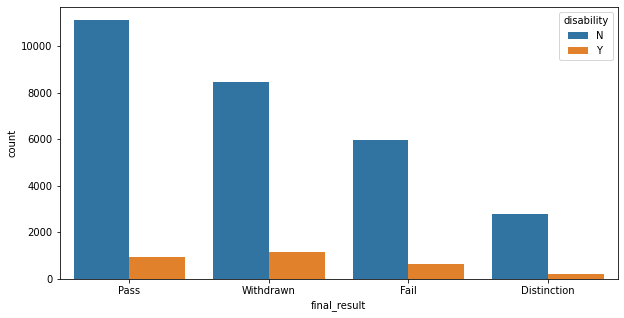

In [ ]:
createCountPlot(data=df_final_active_stu,
                x="final_result",
                hue="disability")

Non-disable Person weights more on multiple output rather than disable person

## Gender & Final Result

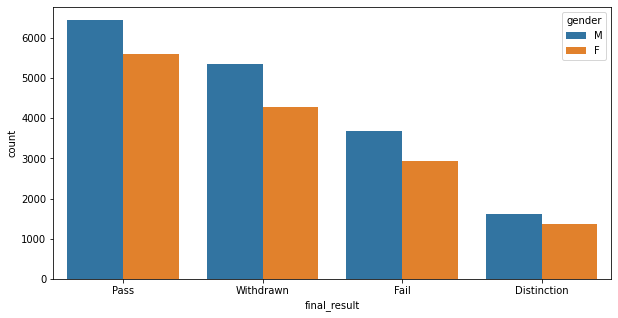

In [ ]:
createCountPlot(data=df_final_active_stu,
                x="final_result",
                hue="gender")

As indicated above, Male tends to score higher number volume in all 4 outputs

## IMD Band & Final Result 
Referring to the document, IMD is shorted for Indices of Multiple Deprivation, which is officially considered of how deprivation of small area when assessing some domains in England

Ref :
https://www.arcgis.com/apps/Cascade/index.html?appid=3c16c360b5704192a550f844b13ffb0a

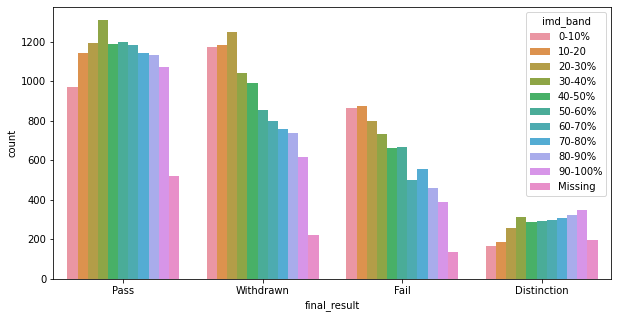

In [ ]:
createCountPlot(data=df_final_active_stu.sort_values("imd_band"),
                x="final_result",
                hue="imd_band")

One noticable point is that all 4 outputs has the slightly decreasing tendency from lowest IMD to highest IMD percentage

## Age & Final Result

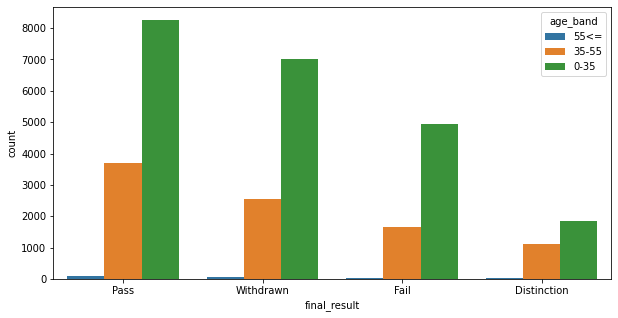

In [ ]:
createCountPlot(data=df_final_active_stu,
                x="final_result",
                hue="age_band")

Practically, student's age band is tremendously spread from the young age to the pre-age 55 

## Region & Final Result 

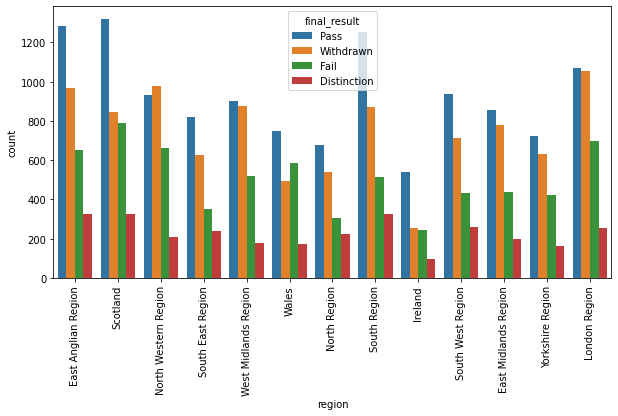

In [ ]:
createCountPlot(data=df_final_active_stu,
                x="region",
                hue="final_result",
                xTickRotation=90)

The tendency is not explicit for observation, due to the unbalanced number of student living in multiple areas

## Highest Education & Final Result

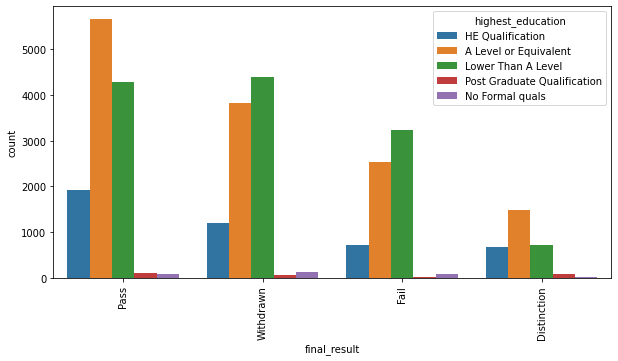

In [ ]:
createCountPlot(data=df_final_active_stu,
                x="final_result",
                hue="highest_education",
                xTickRotation=90)

There are no important keypoint from the above graph

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = df_final_active_stu.apply(le.fit_transform)

In [ ]:
df_final.head(5)

,gender,region,highest_education,imd_band,age_band,disability,final_result,sum_click,mean_score
0,1,0,1,9,2,0,2,934,1993
1,0,6,1,2,1,0,2,1435,1167
2,0,5,0,3,1,1,3,281,0
3,0,7,0,5,1,0,2,2145,1665
4,0,11,2,5,0,0,2,1034,629


# Encoding Labels ( On Progress )

Since our final dataset contains multiple categorical features resolving in difficulty in training model

I will using the One - Hot encoding technique, since our record contains only 1 value at the time 

Those columns will be apply for label encoding :
* gender
* region
* highest_education
* imd_band
* age_band
* disability


In [ ]:
df_final_active_stu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31284 entries, 0 to 31283
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             31284 non-null  object 
 1   region             31284 non-null  object 
 2   highest_education  31284 non-null  object 
 3   imd_band           31284 non-null  object 
 4   age_band           31284 non-null  object 
 5   disability         31284 non-null  object 
 6   final_result       31284 non-null  object 
 7   sum_click          31284 non-null  float64
 8   mean_score         31284 non-null  float64
dtypes: float64(2), object(7)
memory usage: 3.6+ MB


Encoding Features

In [ ]:
cols_to_delete = ["region", "highest_education", "imd_band", "age_band", "disability", "gender"]

In [ ]:

df_features   = pd.get_dummies(data=df_final_active_stu.drop(["final_result"], axis=1),
                             columns=cols_to_delete,
                             drop_first=True)
df_features.head(5)

,sum_click,mean_score,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,imd_band_Missing,age_band_35-55,age_band_55<=,disability_Y,gender_M
0,934.0,82.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,1435.0,66.4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,281.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,2158.0,76.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1034.0,54.4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Encoding Target

In [ ]:
# df_features = pd.get_dummies()
df_target   = pd.get_dummies(data=df_final_active_stu[["final_result"]],
                             columns=["final_result"],
                             drop_first=True)
df_target.head(5)

,final_result_Fail,final_result_Pass,final_result_Withdrawn
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


# Build and Choose the Model

## Train | Test Split Dataset

Split Original Dataset into Training and Validation Set

In [ ]:
X = df_final.loc[:, df_final.columns != "final_result"]
y = df_final["final_result"]

In [ ]:
validation_size = 0.2
seed  = 42

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=validation_size, random_state=seed)

## Implement Various Models

### Comparing Models ( Non - scaled data )

Using Cross Validation

In [ ]:
num_folds = 10
scoring = "accuracy"

Implement our dataset on 4 models to classify the performance 

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names =  []

for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model,X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.553961 (0.015100)
KNN: 0.619051 (0.010966)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.569505 (0.009374)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.661126 (0.010348)


Evaluate Model Model by using BoxPlot based on retrieved result

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

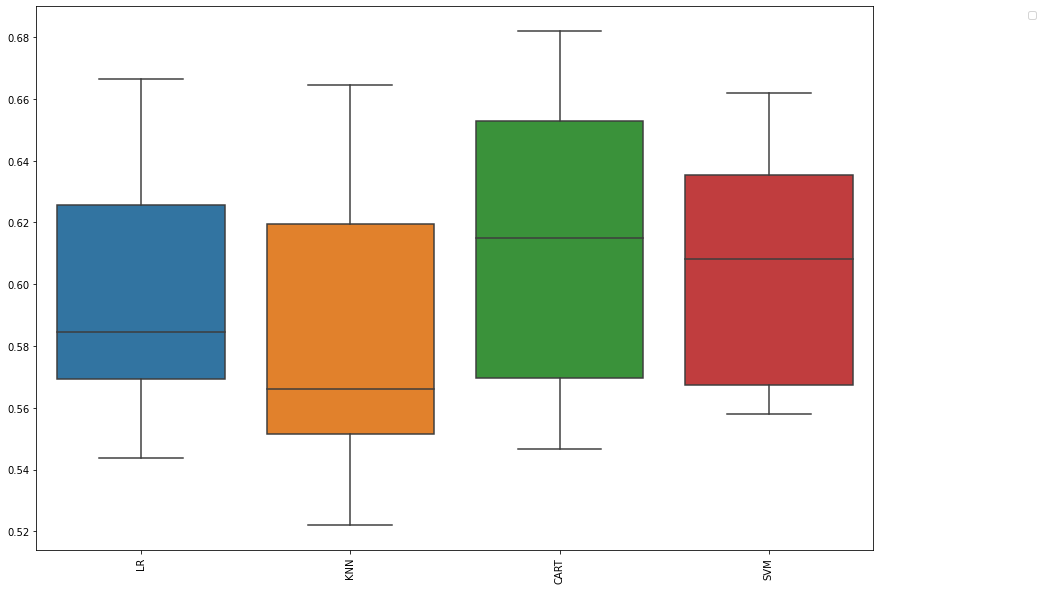

In [ ]:
plt.suptitle('Algorithm Comparison')

results       = np.array(results).reshape(10,4)
df_al_compare = pd.DataFrame(data=results, columns=names)

createBoxPlot(df_al_compare)

We can see that using Decision Tree results in better outcomes than other models

But they are 2 features ( mean_score and sum_clicks ), which are not scaled yet ( that is why KNN perform worst from total )

### Comparing Models ( Scaled - data )

Using Pipeline to perform ScandardScaler

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

Perform Model with Pipeline and Cross Validation

In [ ]:
num_folds = 10
scoring = "accuracy"

In [ ]:
results = []
names =  []

for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model,X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: 0.593959 (0.016156)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: 0.583530 (0.009243)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: 0.568906 (0.008687)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledSVM: 0.620450 (0.015730)


Evaluate Models by using BoxPlot based on retrieved result

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

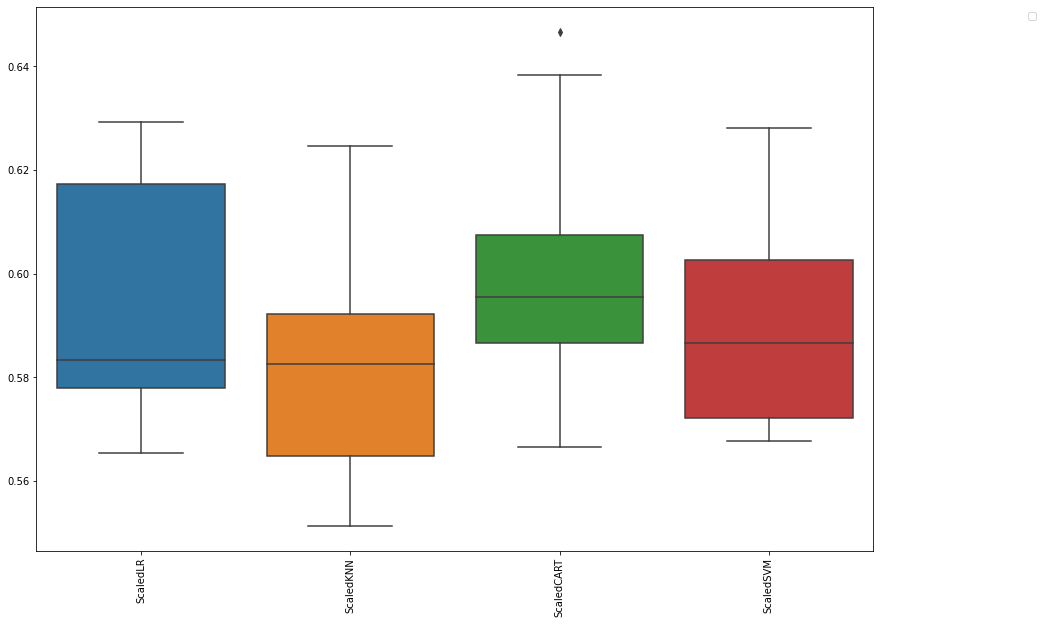

In [ ]:
plt.suptitle('Algorithm Comparison')

results       = np.array(results).reshape(10,4)
df_al_compare = pd.DataFrame(data=results, columns=names)

createBoxPlot(df_al_compare)

As observing above, we can notice that Logistic Regression performing better on scaled data, which take nearly 62% correct

## Choose the model

Since the models evaluation conducted resulting bad score, which could lead to the irrelavent features or data imputation

I decide to choose 2 potential models : Logistic Regression and Decision Tree for testing my dataset after performing pre-evaluation  

### Decision Tree ( No Grid Search CV )

Scale Data

In [ ]:
std_scaler = StandardScaler().fit(X_train)
scaled_X_train = std_scaler.transform(X_train)
scaled_X_validation  = std_scaler.transform(X_validation)

Fit Data to Model

In [ ]:
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(scaled_X_train, y_train)
pred_y_validation = dt.predict(scaled_X_validation)
pred_y_train      = dt.predict(scaled_X_train)

Model Assessment

In [ ]:
print("Accuracy Score on Validation: %.2f%%" % ((100 * accuracy_score(y_validation, pred_y_validation))))
print("Accuracy Score on Training: %.2f%%" % ((100 * accuracy_score(y_train, pred_y_train))))
print(confusion_matrix(y_validation,pred_y_validation))
print(classification_report(y_validation, pred_y_validation))

Accuracy Score on Validation: 57.36%
Accuracy Score on Training: 100.00%
[[ 250   40  229   51]
 [  43  624  377  289]
 [ 282  390 1455  316]
 [  46  316  289 1260]]
              precision    recall  f1-score   support

           0       0.40      0.44      0.42       570
           1       0.46      0.47      0.46      1333
           2       0.62      0.60      0.61      2443
           3       0.66      0.66      0.66      1911

    accuracy                           0.57      6257
   macro avg       0.53      0.54      0.54      6257
weighted avg       0.58      0.57      0.57      6257



Present assessment on heatmap


In [ ]:
model_score = dt.score(scaled_X_validation,y_validation)
cm = confusion_matrix(y_validation, pred_y_validation)

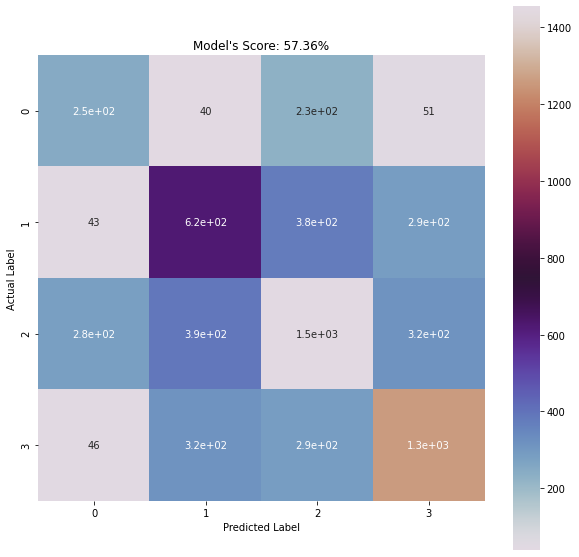

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True, cmap="twilight")

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Model's Score: %.2f%%" % (model_score * 100))
plt.show()

### KNN( GridSearch CV )

Scale Data

In [ ]:
std_scaler = StandardScaler().fit(X_train)
scaled_X_train = std_scaler.transform(X_train)
scaled_X_validation  = std_scaler.transform(X_validation)

Set param_grid for GridSearchCV

In [ ]:
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)

Using K-Fold Cross Validation and GridSearchCV to find the best parameter for our model

In [ ]:
model = KNeighborsClassifier()

In [ ]:
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(scaled_X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.604947 using {'n_neighbors': 17}
0.549606 (0.010849) with: {'n_neighbors': 1}
0.567267 (0.009992) with: {'n_neighbors': 3}
0.582171 (0.009844) with: {'n_neighbors': 5}
0.593319 (0.010555) with: {'n_neighbors': 7}
0.598673 (0.010129) with: {'n_neighbors': 9}
0.599153 (0.009480) with: {'n_neighbors': 11}
0.603269 (0.009567) with: {'n_neighbors': 13}
0.603309 (0.007798) with: {'n_neighbors': 15}
0.604947 (0.008281) with: {'n_neighbors': 17}
0.603189 (0.007921) with: {'n_neighbors': 19}
0.603029 (0.005880) with: {'n_neighbors': 21}


After Searching the best hyper parameter for our model, n_neighbors = 17 results in ~60% accuracy

Fit Data to Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(scaled_X_train,y_train)
pred_y_validation = knn.predict(scaled_X_validation)
pred_y_train      = knn.predict(scaled_X_train)

Presenting assessment on heatmap

In [ ]:
model_score = knn.score(scaled_X_validation,y_validation)
cm = confusion_matrix(y_validation, pred_y_validation)

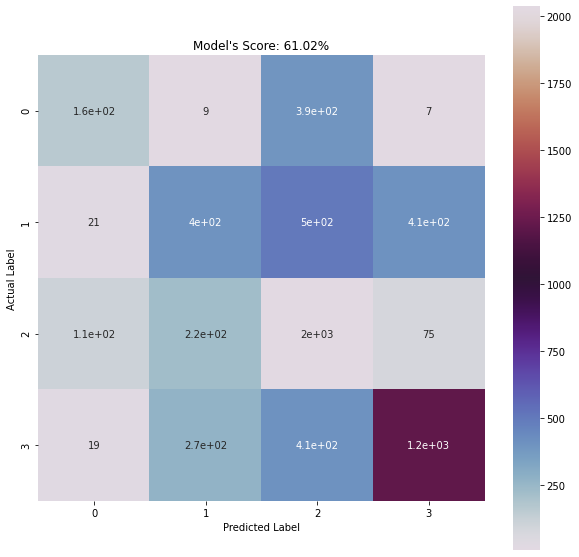

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, square=True, cmap="twilight")

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Model's Score: %.2f%%" % (model_score * 100))
plt.show()